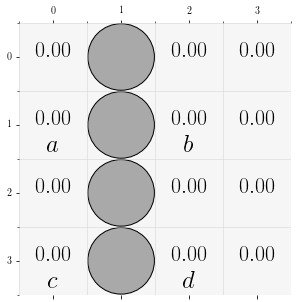

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from csrl.mdp import GridMDP
import numpy as np 

shape = n_rows, n_cols = (4,4)

structure = np.array([
['E','B','E','E'],
['E','B','E','E'],
['E','B','E','E'],
['E','B','E','E'],
['E','E','E','E']
])

label = np.empty(shape,dtype=object)
label.fill(())
label[1,0] = ('a',)
label[1,2] = ('b',)
label[3,0] = ('c',)
label[3,2] = ('d',)

label1 = np.empty(shape,dtype=object)
label1.fill(())
# label1[1,0] = ('a',)
label1[1,2] = ('b',)
# label1[3,0] = ('c',)
label1[3,2] = ('d',)

label2 = np.empty(shape,dtype=object)
label2.fill(())
label2[1,0] = ('a',)
# label1[1,2] = ('b',)
label2[3,0] = ('c',)
# label1[3,2] = ('d',)

    
grid_mdp = GridMDP(shape=shape,structure=structure,label=label,figsize=5, p=0.8)
grid_mdp.plot()

In [65]:
from csrl.oa import OmegaAutomaton

# LTL Specification
ltl1 = '((Fa & !c) U (b)) & (FG c) '
ltl2 = '((Fb & !d) U (a)) & (FG d)' 
# (!d U b) & F(b & a) & F(b U a) & (FG d)

# Translate the LTL formula to an LDBA
oa1 = OmegaAutomaton(ltl1, extra_aps=grid_mdp.all_labels)
oa2 = OmegaAutomaton(ltl2,  extra_aps=grid_mdp.all_labels)

print('Number of Omega-automaton states (including the trap state):',oa1.shape[1])
print('Number of Omega-automaton states (including the trap state):',oa2.shape[1])


['State: 1', '[!0 & !1 & !2] 1', '[0 & !1 & !2] 0', '[!0 & 2] 2', '[0 & 2] 3', 'State: 2', '[!0] 2', '[0] 3', 'State: 3', '[t] 3', '4', 'State: 0', '[!0 & !1 & !2] 1', '[0 & !1 & !2] 0', '[2] 3', 'State: 4', '[1] 4 {0}']
1 set() [!0 & !1 & !2] 1
1 set() [0 & !1 & !2] 0
1 set() [!0 & 2] 2
1 set() [0 & 2] 3
2 set() [!0] 2
2 set() [0] 3
3 set() [t] 3
0 set() [!0 & !1 & !2] 1
0 set() [0 & !1 & !2] 0
0 set() [2] 3
4 {0} [1] 4 {0}
['State: 1', '[!0 & !1 & !2] 1', '[0 & !1 & !2] 0', '[!0 & 2] 2', '[0 & 2] 3', 'State: 2', '[!0] 2', '[0] 3', 'State: 3', '[t] 3', '4', 'State: 0', '[!0 & !1 & !2] 1', '[0 & !1 & !2] 0', '[2] 3', 'State: 4', '[1] 4 {0}']
1 set() [!0 & !1 & !2] 1
1 set() [0 & !1 & !2] 0
1 set() [!0 & 2] 2
1 set() [0 & 2] 3
2 set() [!0] 2
2 set() [0] 3
3 set() [t] 3
0 set() [!0 & !1 & !2] 1
0 set() [0 & !1 & !2] 0
0 set() [2] 3
4 {0} [1] 4 {0}
Number of Omega-automaton states (including the trap state): 6
Number of Omega-automaton states (including the trap state): 6


In [66]:
ltltest = '((!d) M (a&b)) & (FG d)'
OmegaAutomaton(ltltest, extra_aps=grid_mdp.all_labels)

['State: 0', '[!0 & 1 & 2] 1', '[0 & 1 & 2] 0', 'State: 1', '[t] 1', '2', 'State: 2', '[0] 2 {0}']
0 set() [!0 & 1 & 2] 1
0 set() [0 & 1 & 2] 0
1 set() [t] 1
2 {0} [0] 2 {0}


In [96]:
oa2.acc[3]

{(): [None],
 ('a',): [None],
 ('b',): [None],
 ('c',): [None],
 ('d',): [None],
 ('a', 'b'): [None],
 ('a', 'c'): [None],
 ('a', 'd'): [None],
 ('b', 'c'): [None],
 ('b', 'd'): [None],
 ('c', 'd'): [None],
 ('a', 'b', 'c'): [None],
 ('a', 'b', 'd'): [None],
 ('a', 'c', 'd'): [None],
 ('b', 'c', 'd'): [None],
 ('a', 'b', 'c', 'd'): [None]}

In [33]:
oa1.shape

(1, 6)

In [67]:
display(oa1)

In [68]:
display(oa2)

In [109]:
from csrl import ControlSynthesis
import numpy as np 

# Construct product MDPs
csrl1 = ControlSynthesis(grid_mdp,oa1)

csrl2 = ControlSynthesis(grid_mdp,oa2) 

In [110]:
from multi import MultiControlSynthesis

mcsrl = MultiControlSynthesis([csrl1,csrl2],starts=[(0, 0), (0, 3)], mdp=grid_mdp)
mcsrl.shape

(2, 1, 6, 4, 4, 10)

In [76]:
grid_mdp.all_labels

[('a',), ('b',), ('c',), ('d',)]

### TODO: issue with prob 1 trans automaton

In [111]:
qval = mcsrl.combined_qlearning(T=100, K=5000)

In [112]:
#ltl1 = '(!a U b) & F d & FG c'
display(oa1)
mcsrl.plot(0)

interactive(children=(IntSlider(value=0, description='i', max=0), IntSlider(value=0, description='q', max=5), …

In [113]:
# LTL Specification
#ltl2 = '((Fb & !d) U a) & F c & FG d'
display (oa2)
mcsrl.plot(1)
#for i in range(1):
    #mcsrl.plot(i)

interactive(children=(IntSlider(value=0, description='i', max=0), IntSlider(value=0, description='q', max=5), …

In [114]:
policies = [np.argmax(qval[0],axis=4), np.argmax(qval[1],axis=4)]
ep = mcsrl.simulate(agents = mcsrl.agent_control, policy =policies, T= 20, mdp2 =grid_mdp, animation="sharedltl2")

20
e [[(0, 0, 0, 0), (0, 0, 0, 3)]]
0 :  (0, 0, 0) 	 (0, 0, 3)
1 :  (1, 0, 0) 	 (1, 1, 3)
2 :  (2, 0, 0) 	 (0, 1, 2)
3 :  (3, 1, 0) 	 (3, 1, 3)
4 :  (3, 2, 0) 	 (3, 1, 3)
5 :  (3, 3, 0) 	 (3, 1, 3)
6 :  (4, 3, 0) 	 (3, 1, 3)
7 :  (4, 3, 0) 	 (3, 1, 3)
8 :  (4, 3, 0) 	 (3, 1, 3)
9 :  (4, 3, 0) 	 (3, 1, 3)
10 :  (4, 3, 0) 	 (3, 1, 3)
11 :  (4, 3, 0) 	 (3, 1, 3)
12 :  (4, 3, 0) 	 (3, 0, 3)
13 :  (4, 3, 0) 	 (3, 0, 3)
14 :  (4, 3, 0) 	 (3, 0, 3)
15 :  (4, 3, 0) 	 (3, 0, 3)
16 :  (4, 3, 0) 	 (3, 0, 3)
17 :  (4, 3, 0) 	 (3, 0, 3)
18 :  (4, 3, 0) 	 (3, 0, 3)
19 :  (4, 3, 0) 	 (3, 0, 3)


In [115]:
pol = np.argmax(qval[1],axis=4)
pol [0][3]

array([[0, 0, 1, 2],
       [0, 0, 1, 2],
       [0, 0, 3, 2],
       [0, 0, 2, 2]])

In [143]:
np.argmax(qval[0],axis=4)

array([[[[1, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[1, 0, 0],
         [1, 0, 0],
         [1, 0, 0],
         [6, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         [1, 0, 0]],

        [[1, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[1, 0, 0],
         [3, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[1, 0, 0],
         [2, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]]])

In [142]:
print(np.max(mcsrl.Q[0], axis=4))

[[[[0.99995969 0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.99996    0.         0.        ]
   [0.99997    0.         0.        ]
   [0.99998    0.         0.        ]
   [0.99999    0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [1.         0.         0.        ]]

  [[0.99995995 0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.99994892 0.         0.        ]
   [0.99995946 0.         0.        ]
   [0.99995273 0.         0.        ]
   [0.9999413  0.         0.        ]]

  [[0.99995005 0.         0.        ]
   [0.9999574  0.         0.        ]
   [0.99995366 0.         0.        ]
   [0.9999445  0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]


In [116]:
p = np.max(qval[1], axis=4)
print(qval[1][0][3][3])

[[  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [126.87881441 126.87881498 126.87881509 126.87881467   0.
    0.           0.           0.          33.21196389   0.        ]
 [126.87884028 126.87884155 126.87884157 126.8788405    0.
    0.           0.           0.           0.           0.        ]]


In [117]:
csrl2.A[0][3]

array([[list([0, 1, 2, 3, 8]), list([0, 1, 2, 3, 8]),
        list([0, 1, 2, 3, 8]), list([0, 1, 2, 3, 8])],
       [list([0, 1, 2, 3, 8]), list([0, 1, 2, 3, 8]),
        list([0, 1, 2, 3, 8]), list([0, 1, 2, 3, 8])],
       [list([0, 1, 2, 3, 8]), list([0, 1, 2, 3, 8]),
        list([0, 1, 2, 3, 8]), list([0, 1, 2, 3, 8])],
       [list([0, 1, 2, 3, 8]), list([0, 1, 2, 3, 8]),
        list([0, 1, 2, 3, 8]), list([0, 1, 2, 3, 8])]], dtype=object)

In [118]:
csrl2.reward[0][4]

array([[0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 4.01, 0.  ]])